<a href="https://colab.research.google.com/github/adityajain2407/ref-dav-3/blob/main/aj_ref_t_test_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import ttest_1samp, ttest_ind

# Pastries

A french cake shop claims that the average number of pastries they can produce in a day exceeds 500. The average number of pastries produced per day over a 70 day period was found to be 530. Assume that the population standard deviation for the pastries produced per day is 125. Test the claim using a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05, and state your interpretation.

In [ ]:
# First step: Set up H0 and Ha
# H0: mu = 500 (mu <= 500 also works, but cannot computer p-value)
# Ha: mu > 500


z_stat = (530 - 500)/(125/np.sqrt(70))
p_value = 1 - norm.cdf(z_stat)
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
else:
    print("Do not reject H0")

0.022322492581293485
Reject H0


In [ ]:
z = norm.ppf(0.95)
x = 500 + z * 125/np.sqrt(70)
x

524.574701413748

In [ ]:
# What is sales average was 524.57?
1 - norm.cdf((524.574701413748-500)/(125/np.sqrt(70)))

0.050000000000000044

In [ ]:
# What if sales average was 540? What is the p-value?
1 - norm.cdf((540-500)/(125/np.sqrt(70)))

0.0037107735265998754

# Improve IQ with a pill

Population IQ average = 100

One researcher claims that his pill will improve IQ

In [ ]:
# The pill is given to a few people and their IQ is tested with following results:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

In [ ]:
np.mean(iq_scores)

103.5

Establish result at 99% confidence (0.01 significance "alpha")

Here we use T-test

H0: mu = 100 (pill has no effect)
Ha: mu > 100 (pill has good effect)

In [ ]:
t_stat, p_value = ttest_1samp(iq_scores, 100)
print(p_value)
print(t_stat)

0.1754994493585011
1.5071573172061195


In [ ]:
alpha = 0.01 # 99% confidence
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("Pill has no effect")

Fail to reject H0
Pill has no effect


# IQ across 2 schools

In [ ]:
df_iq = pd.read_csv("iq_two_schools.csv")

In [ ]:
df_iq.head()

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


In [ ]:
df_iq.groupby("School")["iq"].mean()

School
school_1    101.153846
school_2    109.416667
Name: iq, dtype: float64

In [ ]:
iq_1 = df_iq[df_iq["School"]=="school_1"]["iq"]
iq_2 = df_iq[df_iq["School"]=="school_2"]["iq"]

In [ ]:
# H0: mu1 = mu2
# Ha: mu1 != mu2

t_stat, p_value = ttest_ind(iq_1, iq_2)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.02004552710936216
Reject H0


In [ ]:
# H0: mu1 = mu2
# Ha: mu1 > mu2

t_stat, p_value = ttest_ind(iq_1, iq_2, alternative="greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.989977236445319
Fail to reject H0


In [ ]:
# H0: mu1 = mu2
# Ha: mu1 < mu2

t_stat, p_value = ttest_ind(iq_1, iq_2, alternative="less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.01002276355468108
Reject H0


# Cricket

In [ ]:
df = pd.read_csv("Sachin_ODI.csv")

In [ ]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


## Batting pattern in first and second innings

In [ ]:
df.groupby("Inns")["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [ ]:
df_first_innings = df[df["Inns"]==1]
df_second_innings = df[df["Inns"]==2]

In [ ]:
# H0: mu1 = mu2 (first and second inns essentially the same)
# Ha: mu1 > mu2 (first inngs avg is significantly more)
alpha = 0.05
t_stat, p_value = ttest_ind(df_first_innings["runs"], df_second_innings["runs"], alternative="greater")
print(p_value)
if p_value < alpha:
    print("Reject H0")
    print("First innings is better")
else:
    print("Fail to reject H0")
    print("Difference we see is just chance")

0.07241862097379982
Fail to reject H0
Difference we see is just chance


## Victory Vs Defeat

In [ ]:
df.groupby("Won")["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [ ]:
df_won = df[df["Won"]==True]
df_lost = df[df["Won"]==False]

In [ ]:
# H0: mu1 = mu2 (same batting pattern)
# Ha: mu1 > mu2 (better scores in matches won)
alpha = 0.05
test_stat, p_value = ttest_ind(df_won["runs"], df_lost["runs"], alternative="greater")
print(p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject")

0.00016353077486826558
Reject H0


# Drug recovery

In [ ]:
d1 = pd.read_csv("drug_1_recovery.csv")
d1

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716
...,...
95,6.890506
96,7.725759
97,6.848016
98,7.969997


In [ ]:
d1.mean()

drug_1    7.104917
dtype: float64

In [ ]:
d2 = pd.read_csv("drug_2_recovery.csv")

In [ ]:
d2

,drug_2
0,9.565974
1,7.492915
2,8.738418
3,7.635235
4,4.125593
...,...
115,7.861993
116,8.233510
117,5.876257
118,7.789454


In [ ]:
d2.mean()

drug_2    8.073423
dtype: float64

In [ ]:
# H0: mu1 = mu2
# Ha: mu1 < mu2
t_stat, p_value = ttest_ind(d1, d2, alternative="less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

[1.27713574e-07]
Reject H0


# Aerofit

In [ ]:
df_aerofit = pd.read_csv("aerofit.csv")

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Gender Vs Income

<AxesSubplot:xlabel='Gender', ylabel='Income'>

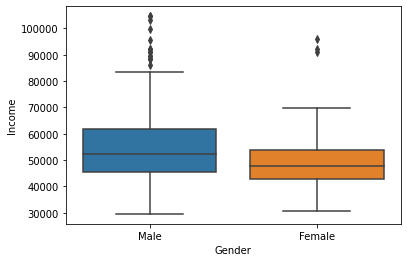

In [ ]:
sns.boxplot(x='Gender', y='Income', data=df_aerofit)

In [ ]:
income_male = df_aerofit[df_aerofit["Gender"]=="Male"]["Income"]
income_female = df_aerofit[df_aerofit["Gender"]=="Female"]["Income"]

In [ ]:
income_male.mean()

56562.75961538462

In [ ]:
income_female.mean()

49828.90789473684

In [ ]:
# H0: same income
# Ha: men having more income
t_stat, p_value = ttest_ind(income_male, income_female, alternative="greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")

0.003263631548607129
Reject H0
